### Introduction to Transformers Architecture

## Overview of the Transformer Architecture

### What is a Transformer?
- A neural network architecture introduced in the paper **"Attention is All You Need"** (Vaswani et al., 2017).
- Relies entirely on the **attention mechanism** to process sequential data, eliminating the need for recurrence (RNNs) or convolution (CNNs).
- Has revolutionized NLP tasks such as translation, summarization, and text generation due to its efficiency and scalability.

---

### Components of the Transformer

#### Encoder
- Processes the input sequence and generates contextualized representations.
- Consists of multiple identical layers (typically 6 or 12).
- **Self-Attention Mechanism:** Captures dependencies between all input tokens, allowing the model to weigh the importance of each token relative to others.
- **Feed Forward Neural Network (FFNN):** Applies a position-wise transformation to the outputs of the attention mechanism.
- **Layer Normalization and Residual Connections:** Applied after each sub-layer to stabilize and speed up training.

#### Decoder
- Generates the output sequence one token at a time.
- Also consists of multiple identical layers.
- **Masked Self-Attention:** Ensures the decoder cannot "see" future tokens, preserving the autoregressive property during training.
- **Encoder-Decoder Attention:** Allows the decoder to attend to the encoder's output, integrating information from the input sequence.
- **Feed Forward Neural Network:** Similar to the encoder, applies position-wise transformations.
- **Layer Normalization and Residual Connections:** Used after each sub-layer.

#### Workflow
1. **Input Sequence** → Encoder → Context Vectors
2. Context Vectors + Previous Outputs → Decoder → Output Sequence

---

### Detailed Breakdown of Transformer Model Layers

#### Self-Attention Layers
- Capture relationships between all tokens in the input sequence.
- Compute attention scores to determine the importance of each token with respect to others.
- Enable parallel processing of sequences, unlike RNNs.

#### Positional Encoding
- Since transformers lack recurrence, positional encoding injects information about token order into the model.
- Typically implemented using sinusoidal functions or learned embeddings.

#### Feed Forward Neural Network
- Applies a position-wise FFNN to the outputs of the attention layers.
- Introduces non-linearity and enhances the representation power of the model.

#### Layer Normalization
- Stabilizes training by normalizing inputs within each layer.
- Helps with faster convergence and better generalization.

#### Multi-Head Attention
- Combines multiple self-attention mechanisms (heads) to learn various aspects of relationships within the sequence.
- Each head operates in a different subspace, allowing the model to capture diverse features.

---

### Key Differences Between Transformers and RNNs

- **Parallelization:** Transformers process entire sequences in parallel, while RNNs process tokens sequentially.
- **Long-Range Dependencies:** Self-attention allows transformers to capture long-range dependencies more effectively than RNNs.
- **Scalability:** Transformers scale better to large datasets and longer sequences.
- **Training Efficiency:** Due to parallelization, transformers train faster and are more efficient on modern hardware.


In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Add, MultiHeadAttention
from tensorflow.keras.utils import plot_model


Define a simplified transformer encoder block

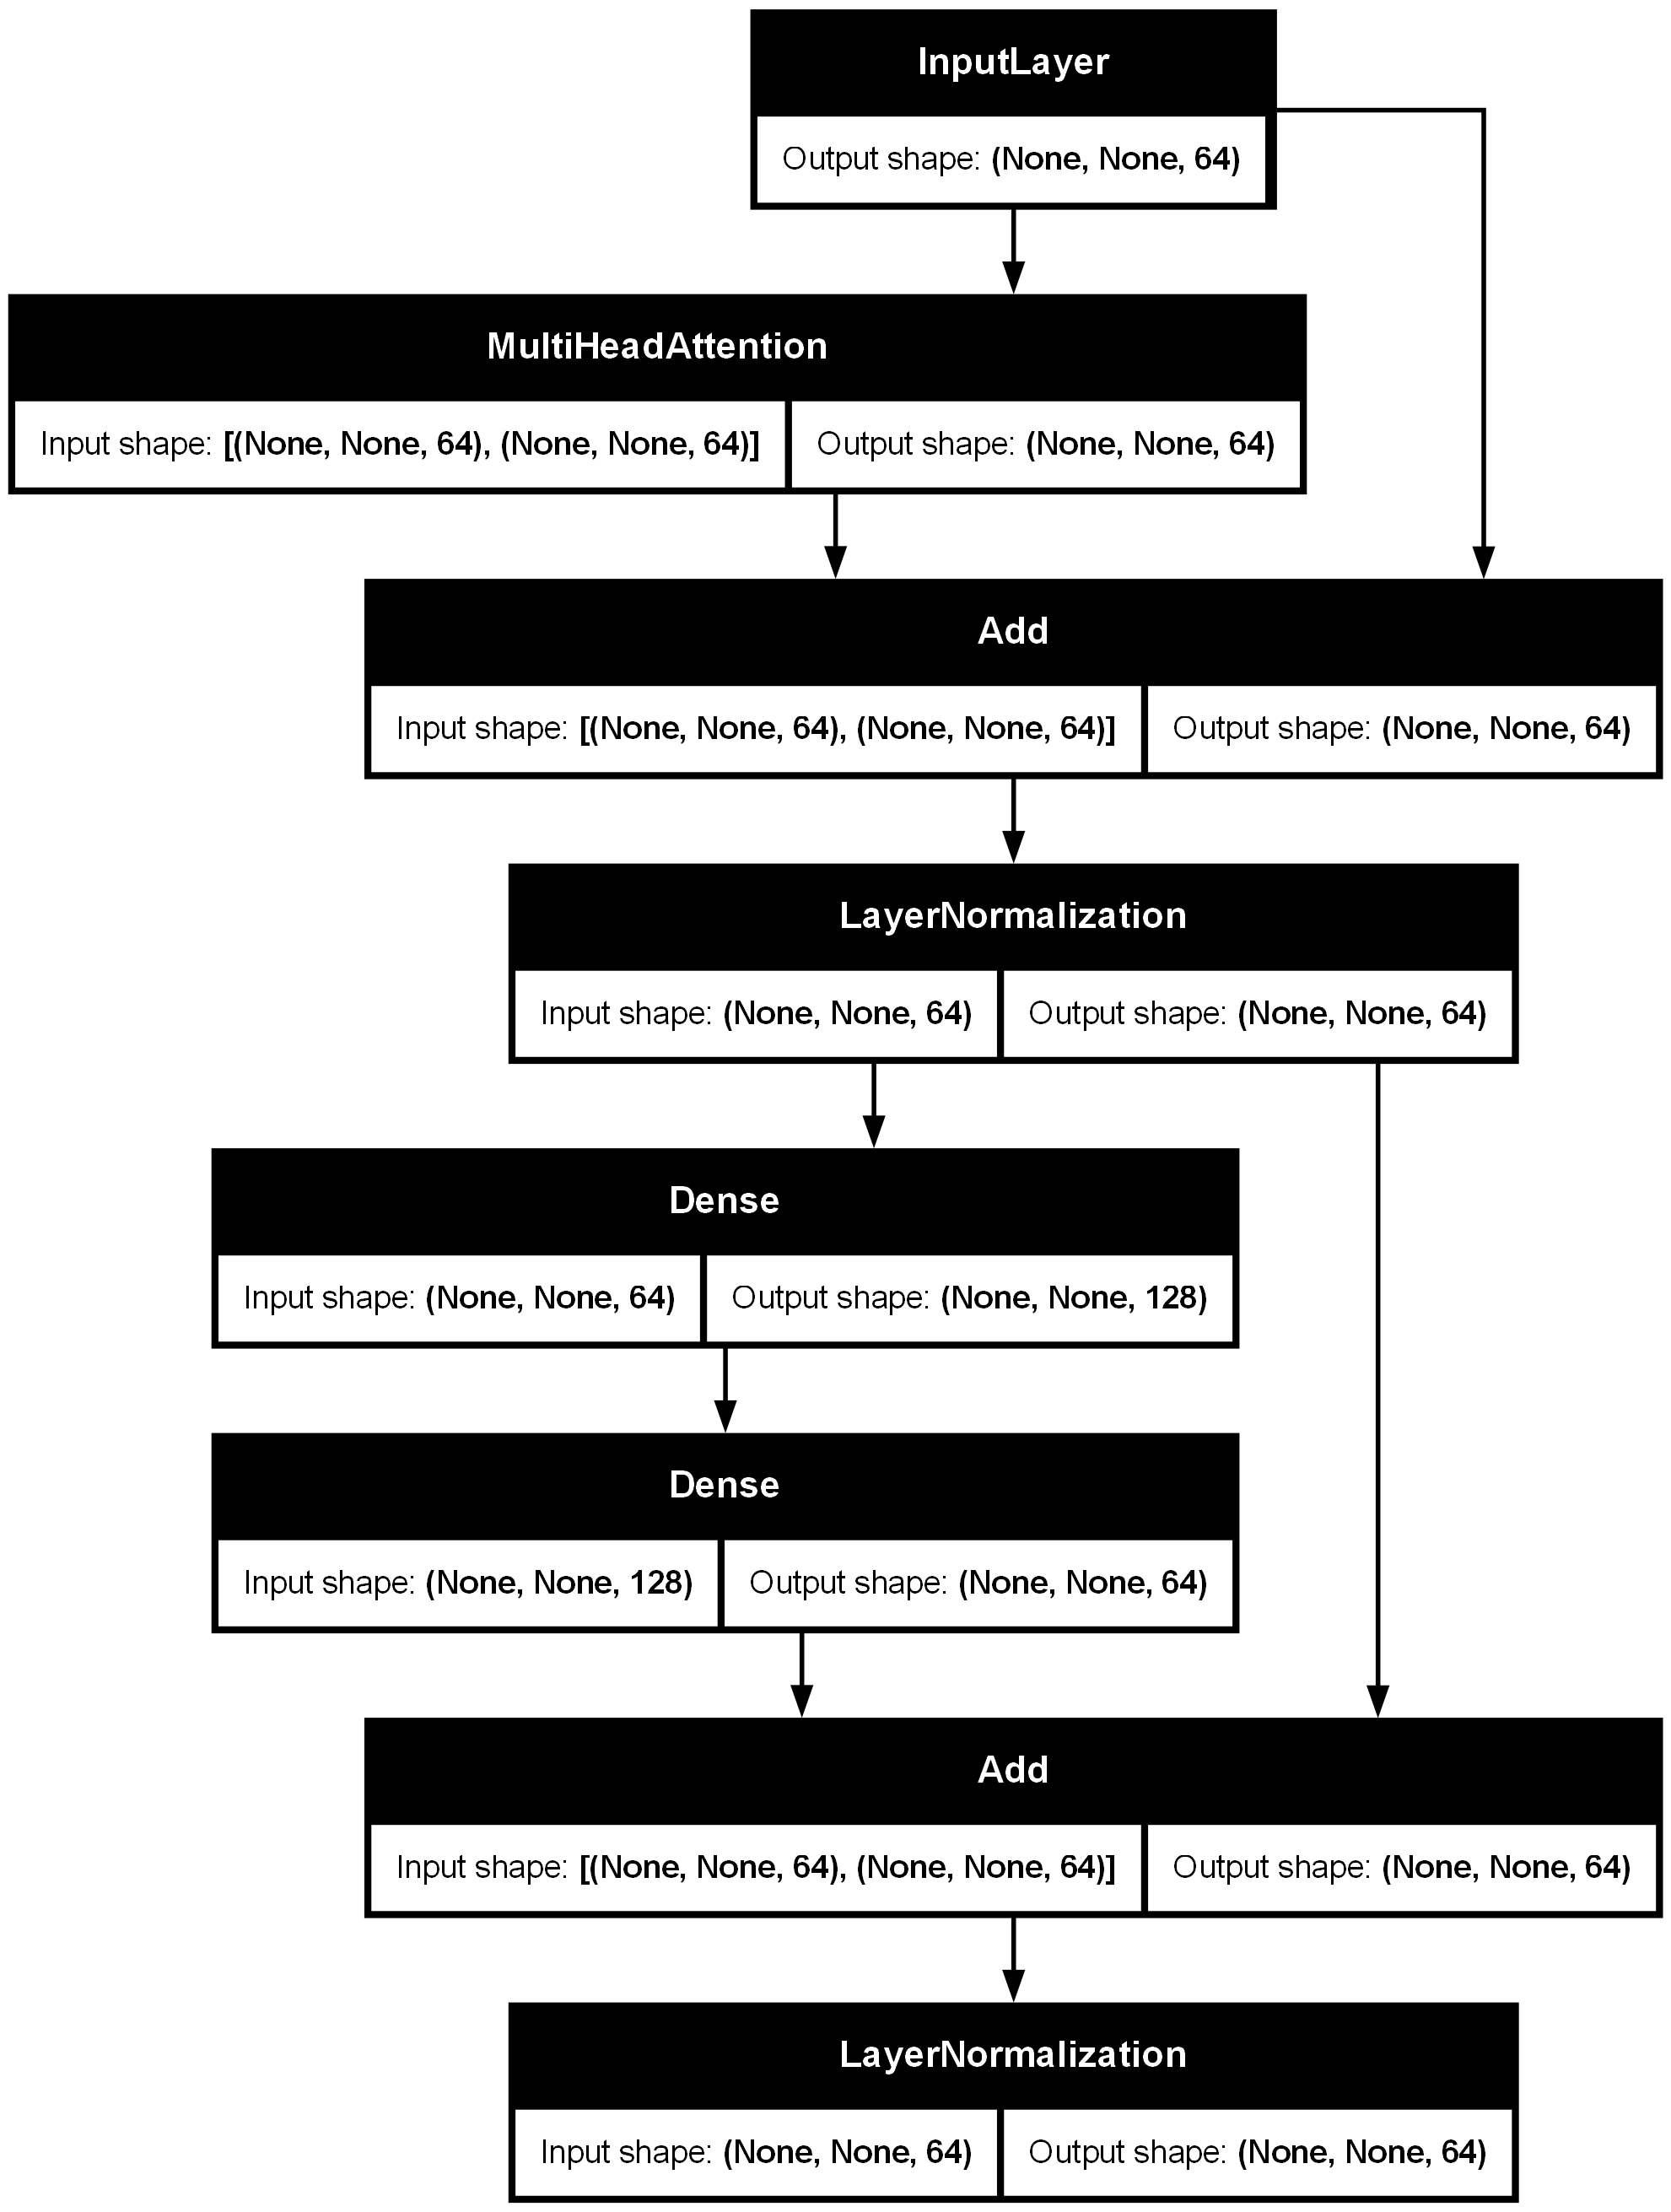

In [2]:
def transformer_encoder(input_dim, num_heads, ff_dm):
    inputs = Input(shape=(None, input_dim))
    # multi head self attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim = input_dim)(inputs, inputs)
    attention_output = Add()([inputs, attention_output])
    attention_output = LayerNormalization()(attention_output)
    # feed forward network
    ff_output = Dense(ff_dm, activation='relu')(attention_output)
    ff_output = Dense(input_dim)(ff_output)
    outputs = Add()([attention_output, ff_output])
    outputs = LayerNormalization()(outputs)
    return Model(inputs=inputs, outputs=outputs)


# create and visualise a sample transofmer encoder block
encoder_block = transformer_encoder(input_dim=64, num_heads=8, ff_dm=128)
plot_model(encoder_block, show_shapes=True, to_file='transformer_encoder.png')

In [3]:
from transformers import BertTokenizer, BertModel

# load a pretrained bert tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# tokenise sample text
text = "Transformers are powerful models for NLP tasks"
inputs = tokenizer(text, return_tensors='pt')

# pass the input through the model
outputs = model(**inputs)
print("Hidden states shape:", outputs.last_hidden_state.shape)

c:\Users\Cyrus\Documents\AI Mastery\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Hidden states shape: torch.Size([1, 10, 768])


In [4]:
from transformers import BertTokenizer, TFBertModel

# load a pretrained bert tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# tokenise sample text
text = "Transformers are powerful models for NLP tasks"
inputs = tokenizer(text, return_tensors='tf')

# pass the input through the model
outputs = model(**inputs)
print("Hidden states shape:", outputs.last_hidden_state.shape)

ValueError: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.